In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2025-02-13 12:26:06.111195: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-13 12:26:06.111860: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-13 12:26:06.115624: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-13 12:26:06.129146: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739445966.152086   49700 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739445966.15

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_images[1].shape

(28, 28)

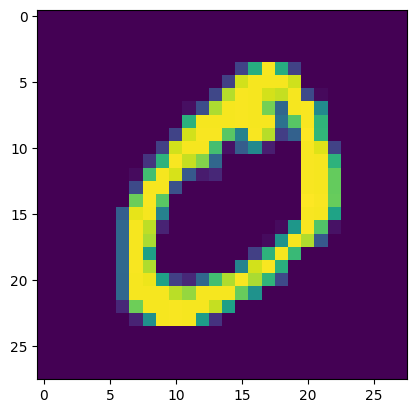

In [4]:
plt.imshow(train_images[1])

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/home/plex/Dokumente/code/py/ki-dhbw/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-13 12:26:22.622094: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=9, batch_size=2**11, 
                    validation_data=(test_images, test_labels))

Epoch 1/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 226ms/step - accuracy: 0.9998 - loss: 6.2877e-04 - val_accuracy: 0.9889 - val_loss: 0.0591
Epoch 2/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.9910 - val_loss: 0.0513
Epoch 3/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 220ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9886 - val_loss: 0.0612
Epoch 4/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.9993 - loss: 0.0019 - val_accuracy: 0.9912 - val_loss: 0.0504
Epoch 5/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.9998 - loss: 6.4059e-04 - val_accuracy: 0.9893 - val_loss: 0.0592
Epoch 6/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9913 - val_loss: 0.0571
Epoch 7/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 220ms/step - accuracy: 0.9990 - loss: 0.0032 - val_accuracy: 0.9915 - val_loss: 0.0426
Epoch 8/9
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.9995 - loss: 0.0013 - val_accuracy: 0.

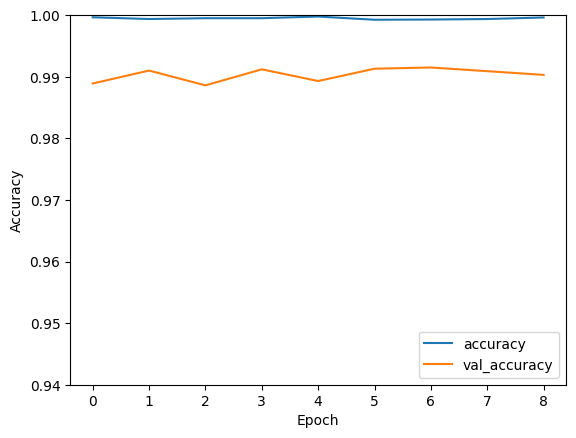

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.94, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [18]:
fc_model = models.Sequential()
fc_model.add(layers.Flatten(input_shape=(28, 28, 1)))
fc_model.add(layers.Dense(64, activation='relu'))
fc_model.add(layers.Dense(256, activation='relu'))
fc_model.add(layers.Dense(128, activation='relu'))
fc_model.add(layers.Dense(10))
fc_model.summary()

/home/plex/Dokumente/code/py/ki-dhbw/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,066 (394.79 KB)

 Trainable params: 101,066 (394.79 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
fc_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = fc_model.fit(train_images, train_labels, epochs=19, batch_size=2**11,
                       validation_data=(test_images, test_labels))

Epoch 1/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8671 - loss: 0.5650 - val_accuracy: 0.9069 - val_loss: 0.3756
Epoch 2/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9247 - loss: 0.2681 - val_accuracy: 0.9186 - val_loss: 0.3140
Epoch 3/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9443 - loss: 0.1906 - val_accuracy: 0.9280 - val_loss: 0.2941
Epoch 4/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9553 - loss: 0.1517 - val_accuracy: 0.9300 - val_loss: 0.2747
Epoch 5/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9658 - loss: 0.1137 - val_accuracy: 0.9368 - val_loss: 0.2674
Epoch 6/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9706 - loss: 0.0940 - val_accuracy: 0.9401 - val_loss: 0.2535
Epoch 7/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9754 - loss: 0.0779 - val_accuracy: 0.9435 - val_loss: 0.2439
Epoch 8/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9813 - loss: 0.0597 - val_accuracy: 0.9431 - v

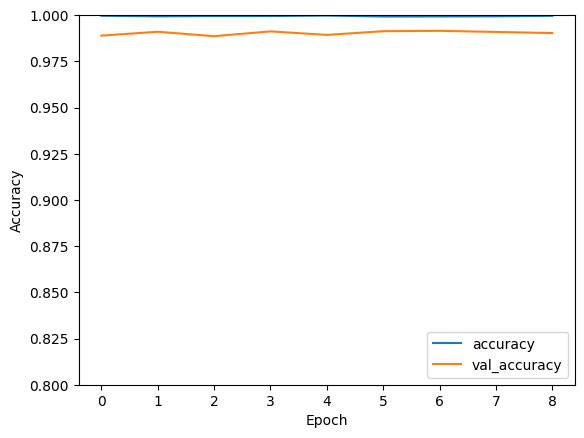

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')